<a href="https://colab.research.google.com/github/ishan711997/Boston-dataset-linear-regression/blob/main/1st_Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [117]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module : Machine Learning/housing.csv")

In [118]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [119]:
data.shape

(506, 14)

In [120]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [121]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


as we can see in this data there is no null value

In [123]:
# sns.pairplot(data, diag_kind ='kde')

<Axes: >

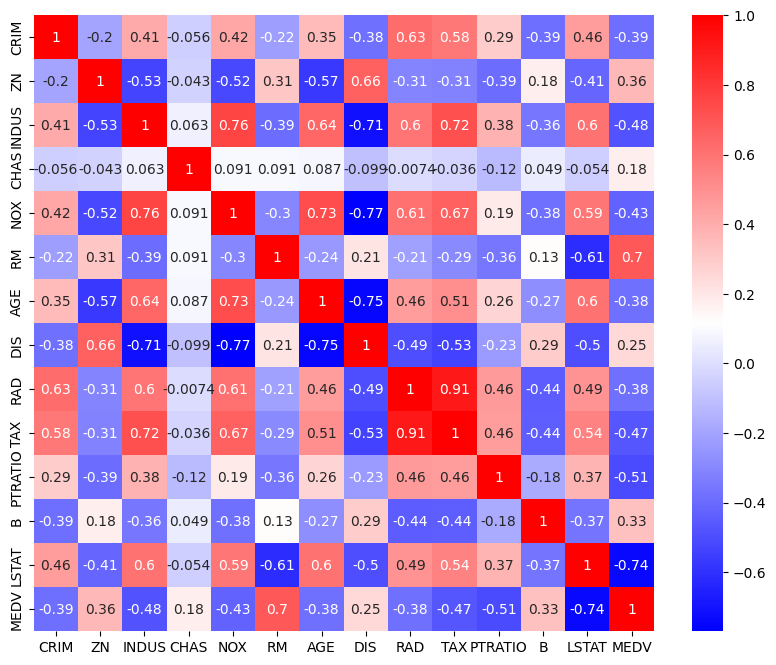

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot= True, cmap='bwr')

**Red** - positively correlated.
**Blue** - negatively correlated.

<h3>From above heatmap we can see our dependent variable MEDV </h3>

*   Highly **+ve** correlated to **RM**
*   Highly **-ve** correlated to **LSTAT**

<h3>And for independent variables </h3>

*   RAD-TAX and NOX-INDUS Highly **+ve** correlated.
*   DIS-AGE and DIS-NOX Highly **-ve** correlated.

since linear regression can be apply only on those data features whose dependent and independent variable is linear
Therefor we can use RM and LSTAT for linear regression and better to avoid RAD, TAX, NOX ,INDUS, AGE, DIS as these features have multi-colinearity.

Text(0, 0.5, 'MEDV')

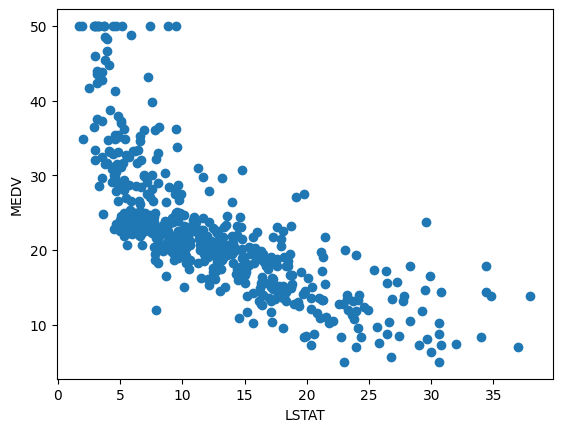

In [125]:
plt.scatter(data['LSTAT'], data['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

This scatter plot representing -ve linear regression, we can clearly see that as the lower status of population increases, price of homes decrease.

Text(0, 0.5, 'MEDV')

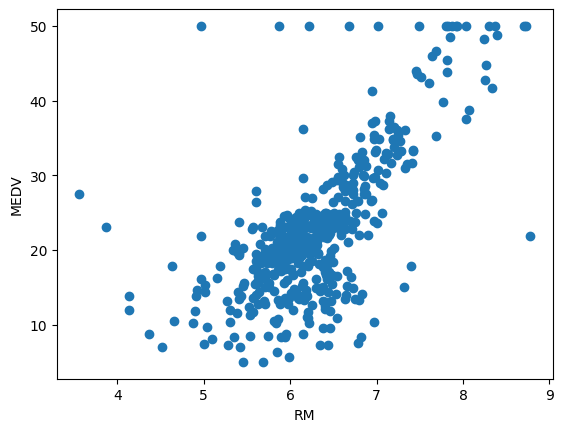

In [126]:
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')

RM and MEDV have +ve linear regression, as much as rooms per house would be, those house price also will be high.

# Best Fit line

Since we have seen RM and LSTAT strongly correlated to MEDV, Hence we will take only these variable for making our model.

## finding slope and intercept for RM and MEDV and plotting best fit line on scatter plot

In [127]:
df = data[['RM', 'LSTAT', 'MEDV']]

In [128]:
df.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [129]:
rmdf = {'y' : df['MEDV'], 'x' : df['RM']}
rmdf = pd.DataFrame(rmdf)
rmdf.head()

,y,x
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147


In [130]:
rmdf['x2'] = rmdf['x']**2

In [131]:
rmdf['xy'] = rmdf['x'] * rmdf['y']

In [132]:
rmdf.head()

,y,x,x2,xy
0,24.0,6.575,43.230625,157.8000
1,21.6,6.421,41.229241,138.6936
2,34.7,7.185,51.624225,249.3195
3,33.4,6.998,48.972004,233.7332
4,36.2,7.147,51.079609,258.7214


In [133]:
# sum of all columns which is in rmdf datafrmae
n = len(rmdf['y'])
sum_x = rmdf['x'].sum()
sum_y = rmdf['y'].sum()
sum_x2 = rmdf['x2'].sum()
sum_xy = rmdf['xy'].sum()

# formula apply for finding slope
b1 = (n*sum_xy - (sum_x*sum_y)) / ((n*sum_x2) - (sum_x)**2)
b1

9.102108981180319

In [134]:
# formula apply for finding intercept
b0 = (sum_y - b1*sum_x) / n
b0

-34.670620776438625

In [149]:
best_fit_line = (b1*rmdf['x']) + b0
best_fit_line

0      28.307266
1      28.453574
2      27.727736
3      27.905396
4      27.763838
         ...    
501    28.290165
502    28.739539
503    27.926297
504    28.099206
505    28.825043
Name: x, Length: 506, dtype: float64

Text(0, 0.5, 'MEDV')

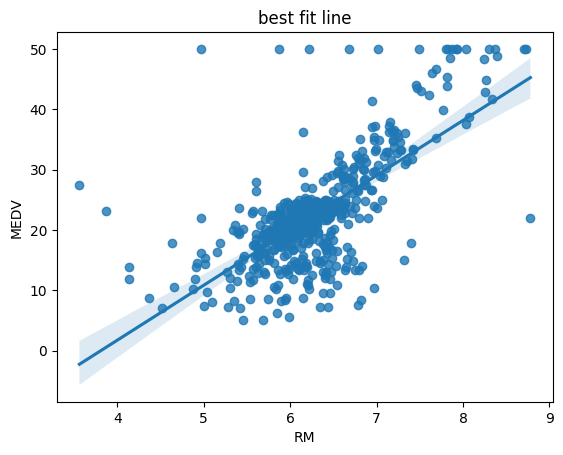

In [150]:
# using linear regression best fit line
sns.regplot(x=rmdf['x'],y=rmdf['y'])
plt.title('best fit line')
plt.xlabel('RM')
plt.ylabel('MEDV')

## finding slope and intercept for LSTAT and MEDV and plotting best fit line on scatter plot

In [ ]:
df.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [138]:
lstat_df = {'y' : df['MEDV'], 'x' : df['LSTAT']}
lstat_df = pd.DataFrame(lstat_df)
lstat_df.head()

,y,x
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


In [143]:
lstat_df['x2'] = lstat_df['x']**2

In [144]:
lstat_df['xy'] = lstat_df['x'] * lstat_df['y']

In [145]:
lstat_df.head()

,y,x,x2,xy
0,24.0,4.98,24.8004,119.520
1,21.6,9.14,83.5396,197.424
2,34.7,4.03,16.2409,139.841
3,33.4,2.94,8.6436,98.196
4,36.2,5.33,28.4089,192.946


In [147]:
# sum of all columns which is in lstat_df datafrmae
n = len(lstat_df['y'])
sum_x = lstat_df['x'].sum()
sum_y = lstat_df['y'].sum()
sum_x2 = lstat_df['x2'].sum()
sum_xy = lstat_df['xy'].sum()

# formula apply for finding slope
b1 = (n*sum_xy - (sum_x*sum_y)) / ((n*sum_x2) - (sum_x)**2)
b1

-0.9500493537579933

In [151]:
# formula apply for finding intercept
b0 = (sum_y - b1*sum_x) / n
b0

34.55384087938314

In [155]:
best_fit_line = (b1*lstat_df['x']) + b0
best_fit_line

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Name: x, Length: 506, dtype: float64

Text(0, 0.5, 'MEDV')

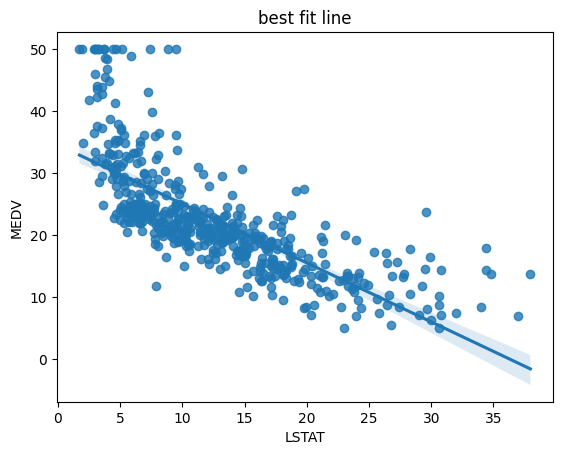

In [156]:
# using linear regression best fit line
sns.regplot(x=lstat_df['x'],y=lstat_df['y'])
plt.title('best fit line')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')